In [187]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline

# Gráfica de Líneas

Las gráficas de linea nos permite mostrar información historicamente, es decir, como se comporta una variable a lo largo del tiempo. También se pueden comparar dos o más variables a lo largo del tiempo, como el caso que veremos más adelante.

En este ejemplo, utilizaremos dos listas:  
- **Años**: Representa los años de registro.  
- **Ventas**: Representa las ventas de una empresa.  

## Funciones utilizadas:
1. **`plot()`**:  
   - Permite graficar los datos en una línea.  
   - Personalizamos la gráfica:  
     - **`marker`**: Definimos el marcador en cada punto de la línea.  
     - **`color`**: Establecemos el color de la línea.  
     - **`linestyle`**: Definimos el estilo de la línea (continua, discontinua, etc.).  
     - **`linewidth`**: Ajustamos el ancho de la línea.  
     - **`markersize`**: Cambiamos el tamaño del marcador.

2. **`title()`**: Agregamos un título a la gráfica.

3. **`xlabel()`**: Agregamos un título al eje **x**.

4. **`ylabel()`**: Agregamos un título al eje **y**.

5. **`xticks()`**: Permite personaliza los valores del eje **x**, como la rotación o el formato de las etiquetas.


([<matplotlib.axis.XTick at 0x267bfe60140>,
 [Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024')])

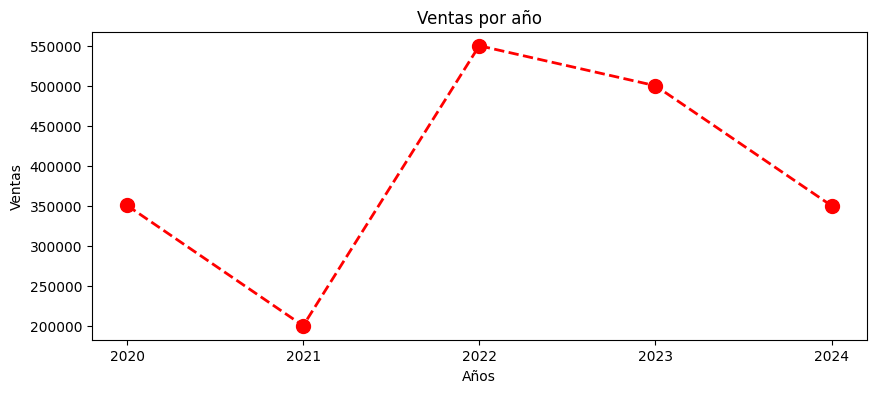

In [173]:


lista_anios = [2020, 2021, 2022, 2023, 2024]
lista_ventas = [350400, 200000, 550000, 500000, 350000]

plt.figure(figsize=(10, 4))
plt.plot(lista_anios, lista_ventas, marker='o', color='r', linestyle='--', linewidth=2, markersize=10)
plt.title('Ventas por año')
plt.xlabel('Años')
plt.ylabel('Ventas')
plt.xticks(lista_anios)


### Caso:

Vamos a graficar un grupo de lineas a traves del tiempo(Día) del total de personas registradas por Dia y cada linea que se cree representará a una Carrera.  
Usaremos pandas para proceder a extraer la información.

In [174]:
mi_data_modalidad = pd.read_csv('data/ModalidadVirtual.csv', parse_dates=['time'])
mi_data_modalidad.head()

,Unnamed: 0,time,carrera,acepta,positivo,negativo,edad,sexo,trabajo
0,0,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,Contacto Personal Docente-Estudiantil.,20,Hombre,Eventual
1,1,2020-11-08,Psicología,Si,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,26,Hombre,Eventual
2,2,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,"Falta de recursos de calidad(plataformas, doce...",20,Mujer,Sí
3,3,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,Conexión a internet.,18,Mujer,No
4,4,2020-11-08,Ingeniería de Sistemas,Si,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,39,Hombre,Sí


# Pandas: Transformación y Visualización de Datos

## Pasos iniciales con Pandas:

1. **Creación de nuevas columnas:**  
   Transformaremos el campo **fecha** en columnas separadas: **Año**, **Mes** y **Día**.

2. **Cálculo del total:**  
   - Usamos la función **`size()`** para obtener el total de registros.  
   - Agrupamos los datos con la función **`groupby()`**, utilizando las columnas **carrera** y **Día**.  
   - El resultado del cálculo se almacenará en una nueva variable, que será nuestro nuevo DataFrame.

3. **Separación de valores en variables:**  
   Crearemos tres variables:  
   - **dia**: Para manejar los días.  
   - **total**: Para manejar los totales.  
   - **carrera**: Para manejar las carreras.  

---

## Creación de la gráfica:

### Haciendo la gráfica dinámica:
Dado que los datos pueden variar y no ser estáticos, utilizaremos un bucle **`for`** para automatizar la creación de las líneas de la gráfica.

1. **Identificación de carreras:**  
   Cada carrera representará una línea en la gráfica. Para ello, recorreremos todas las carreras únicas en el DataFrame:  
   ```python
   for carrera in dataframe["carrera"].unique():

2. Filtrando datos dentro del bucle:  
    Para cada carrera:  
        - Día: Obtenemos una lista de los días correspondientes a la carrera filtrada.  
        - Total: Obtenemos una lista de los totales correspondientes a la carrera filtrada.  
    Usamos plt.plot() para graficar los datos obtenidos.  
        dentro de la función el asignar a label=carrera, hará que identique la linea de la carrera. Al momento de llamar a la funcion legend() nos dará mayor precisión

3. Estilo adicional a la gráfica:  
    Al final, agregamos una cuadrícula con la función plt.grid(), utilizando un estilo de línea "--" para mejorar el diseño.

4. Por ultimo mostramos la leyenda para darle más sentido a la gráfica.


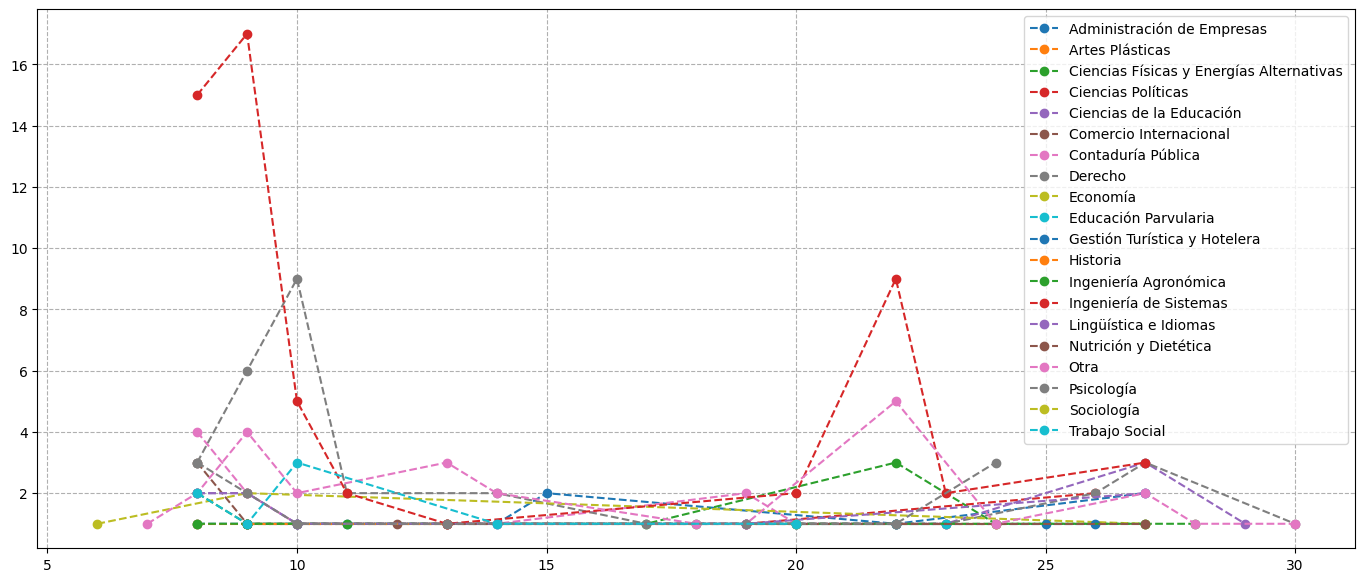

In [185]:
mi_data_modalidad["Año"] = mi_data_modalidad["time"].dt.year
mi_data_modalidad["Mes"] = mi_data_modalidad["time"].dt.month
mi_data_modalidad["Dia"] = mi_data_modalidad["time"].dt.day 
df_total_reg_carrera_dia = mi_data_modalidad.groupby(["carrera", "Dia"]).size().reset_index(name='Total')

dia = df_total_reg_carrera_dia["Dia"]
total = df_total_reg_carrera_dia["Total"]
carrera = df_total_reg_carrera_dia["carrera"]

plt.figure(figsize=(17, 7))
for carrera in df_total_reg_carrera_dia["carrera"].unique():    
    Dia = df_total_reg_carrera_dia[df_total_reg_carrera_dia["carrera"] == carrera]["Dia"].reset_index(drop=True)   
    Total = df_total_reg_carrera_dia[df_total_reg_carrera_dia["carrera"] == carrera]["Total"].reset_index(drop=True)   
    plt.plot(Dia, Total, label=carrera, marker='o',  linestyle='--')

plt.grid(True, linestyle='--')
plt.legend()



### Mejora de la Visualización en la Gráfica

Como se puede apreciar en la gráfica de arriba, se están mostrando muchas carreras, lo que dificulta la legibilidad. Para solucionar esto, podemos filtrar las carreras que queremos mostrar en la gráfica.  
En este caso, se filtrarán las carreras que comiencen con "Ingeniería".  

#### Cambios Introducidos al Código

1. **Realizamos el filtro deseado**:  
   Usamos Pandas para filtrar la información utilizando **`str.startswith("Ingeniería")`**, lo que nos permite obtener únicamente las carreras de Ingeniería.  

2. **Mantenemos la lógica del código anterior**, pero añadimos un **for** adicional.

#### ¿Qué estamos haciendo en este nuevo `for`?

El objetivo ahora es mostrar los valores de cada punto en la gráfica, lo que mejora la visibilidad de los datos.  

3. **Estructura del nuevo `for`**:  
   - Está compuesto por **dos `for`**, uno anidado dentro del otro.  

4. **Primer `for`**:  
   - Recorremos las carreras filtradas.  

5. **Segundo `for`**:  
   - Recorremos el nuevo DataFrame filtrado para obtener:  
     - **Día**: Representa el día correspondiente.  
     - **Total**: Representa el total de la carrera en ese día.  

6. **Uso de `plt.text()`**:  
   - Dentro del segundo `for`, usamos **`plt.text(dia, total, f'{total}')`** para mostrar el valor de cada punto en la gráfica.

Este enfoque nos permite visualizar únicamente las carreras relevantes y, además, destacar los datos específicos directamente en la gráfica.




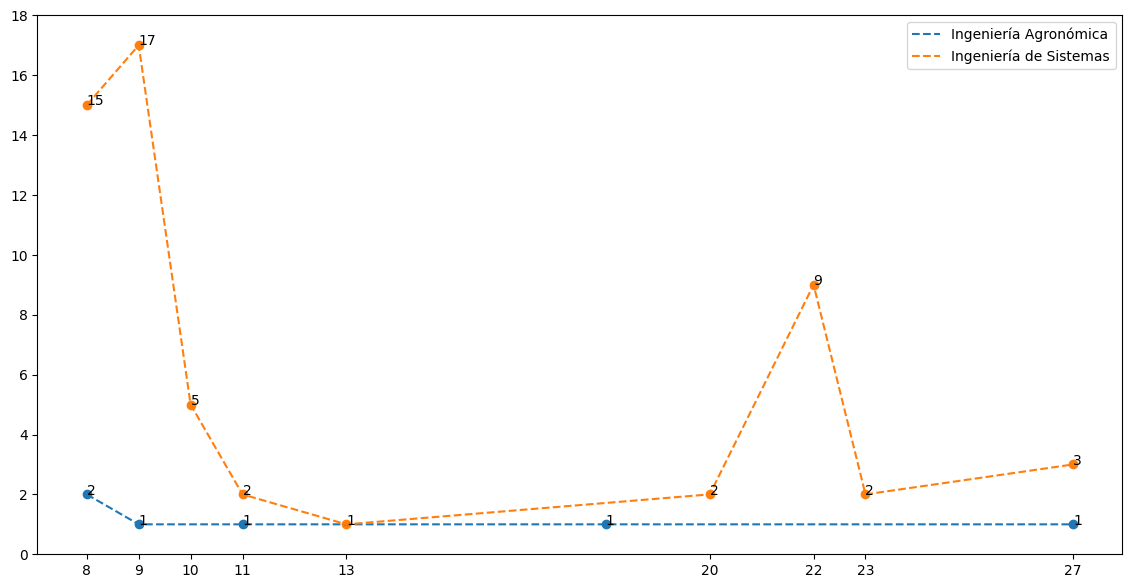

In [199]:

df_carrera_elegida = df_total_reg_carrera_dia[df_total_reg_carrera_dia["carrera"].str.startswith("Ingeniería")].reset_index(drop=True)


dia = df_carrera_elegida["Dia"]
total = df_carrera_elegida["Total"]
carrera = df_carrera_elegida["carrera"]

plt.figure(figsize=(14, 7))
for carrera in df_carrera_elegida["carrera"].unique():
    
    Dia = df_carrera_elegida[df_carrera_elegida["carrera"] == carrera]["Dia"]
    Total = df_carrera_elegida[df_carrera_elegida["carrera"] == carrera]["Total"]

    #x_nuevo = np.linspace(Dia.min(), Dia.max(), 500)  # Genera más puntos entre los años originales
    #spl1 = make_interp_spline(Dia, Total, k=3)
    #y_nuevo = spl1(x_nuevo)

    plt.plot(Dia, Total, label=carrera, linestyle='--')
    plt.scatter(Dia, Total,  marker="o")


for carrera in df_carrera_elegida["carrera"].unique():
    df_carrera_filtrada = df_carrera_elegida[df_carrera_elegida["carrera"] == carrera].reset_index(drop=True)
    for index, row in df_carrera_filtrada.iterrows():
        dia = row["Dia"]
        total = row["Total"]        
        plt.text(dia, total, f'{total}')



plt.xticks(Dia)
plt.yticks(np.arange(0, 20, 2))
plt.legend()